In [8]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=fb4d06d17edd95813d3700c321c02a1e750a65c46b7d0aa39b09b9bbe14dc476
  Stored in directory: /Users/aanchal/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 559


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | brisas de zicatela
Processing Record 2 of Set 1 | oriximina
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | fenyi
Processing Record 8 of Set 1 | san nicolas
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | marka
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ingeniero jacobacci
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | turkmenbasy
Processing Record 19 of Set 1 | borda da mata
Processing Record 20 of Set 1 | malvan
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | edinburgh of th

Processing Record 40 of Set 4 | colonia
Processing Record 41 of Set 4 | palasa
Processing Record 42 of Set 4 | castillos
Processing Record 43 of Set 4 | nagaur
Processing Record 44 of Set 4 | kerikeri
Processing Record 45 of Set 4 | annan
Processing Record 46 of Set 4 | plettenberg bay
Processing Record 47 of Set 4 | baukau
Processing Record 48 of Set 4 | beinamar
Processing Record 49 of Set 4 | ulsteinvik
Processing Record 0 of Set 5 | san julian
Processing Record 1 of Set 5 | rikaze
Processing Record 2 of Set 5 | ta`u
Processing Record 3 of Set 5 | berrotaran
Processing Record 4 of Set 5 | port saint john's
Processing Record 5 of Set 5 | g'ijduvon shahri
City not found. Skipping...
Processing Record 6 of Set 5 | az zawr
Processing Record 7 of Set 5 | ketchikan
Processing Record 8 of Set 5 | miquelon
Processing Record 9 of Set 5 | berezovyy
Processing Record 10 of Set 5 | corn island
Processing Record 11 of Set 5 | quellon
Processing Record 12 of Set 5 | moree
Processing Record 13 of 

Processing Record 32 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 33 of Set 8 | buka
Processing Record 34 of Set 8 | mao
Processing Record 35 of Set 8 | senillosa
Processing Record 36 of Set 8 | chernyshevsk
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | luganville
Processing Record 39 of Set 8 | anzio
Processing Record 40 of Set 8 | enewetak
Processing Record 41 of Set 8 | najran
Processing Record 42 of Set 8 | presidente olegario
Processing Record 43 of Set 8 | ovalle
Processing Record 44 of Set 8 | bayanhongor
Processing Record 45 of Set 8 | sur
Processing Record 46 of Set 8 | valdivia
Processing Record 47 of Set 8 | nema
Processing Record 48 of Set 8 | raduzhny
Processing Record 49 of Set 8 | lebork
Processing Record 0 of Set 9 | mascara
Processing Record 1 of Set 9 | oyama
Processing Record 2 of Set 9 | sovetskaya gavan'
Processing Record 3 of Set 9 | meadow lake
Processing Record 4 of Set 9 | walvis bay
Processing Record 5 of Se

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,brisas de zicatela,15.8369,-97.0419,29.29,58,75,2.06,MX,1696549400
1,oriximina,-1.7656,-55.8661,31.62,45,94,1.33,BR,1696549400
2,waitangi,-43.9535,-176.5597,13.79,82,93,3.13,NZ,1696549401
3,iqaluit,63.7506,-68.5145,2.85,100,100,13.89,CA,1696549402
4,arraial do cabo,-22.9661,-42.0278,22.47,95,90,4.47,BR,1696549303


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brisas de zicatela,15.8369,-97.0419,29.29,58,75,2.06,MX,1696549400
1,oriximina,-1.7656,-55.8661,31.62,45,94,1.33,BR,1696549400
2,waitangi,-43.9535,-176.5597,13.79,82,93,3.13,NZ,1696549401
3,iqaluit,63.7506,-68.5145,2.85,100,100,13.89,CA,1696549402
4,arraial do cabo,-22.9661,-42.0278,22.47,95,90,4.47,BR,1696549303


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

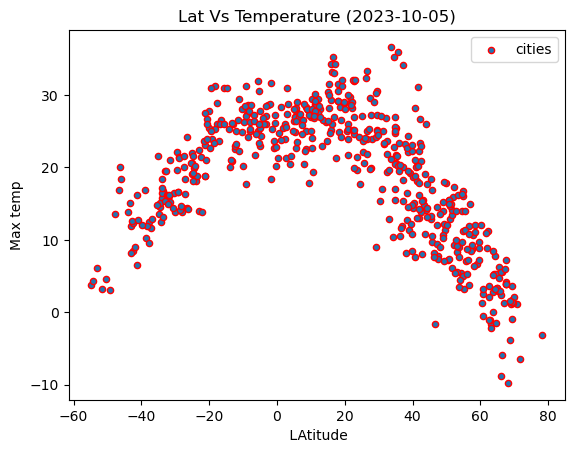

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

city_data_df.plot.scatter(x = "Lat", y = "Max Temp",
    edgecolor="red",
    linewidths=1,
    marker="o",
    label="cities"    
)
# Incorporate the other graph properties
# YOUR CODE HERE
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Temperature ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Max temp")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

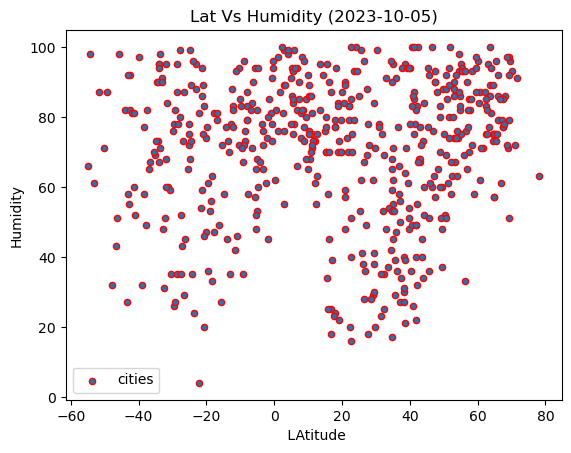

In [15]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y = "Humidity",
    edgecolor="red",
    linewidths=1,
    marker="o",
    label="cities"  
                         )
# Incorporate the other graph properties
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Humidity ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

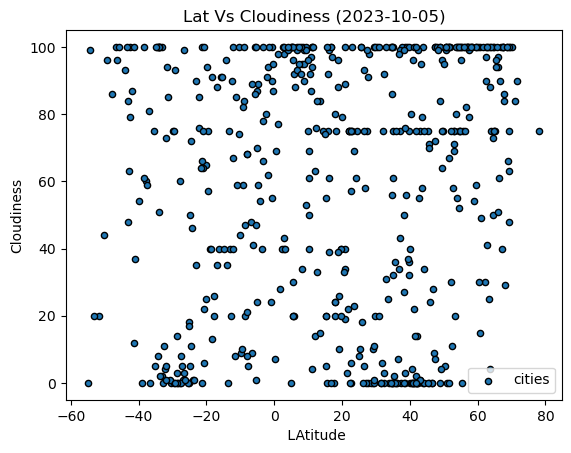

In [16]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="cities"  
                         )

# Incorporate the other graph properties
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Cloudiness ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

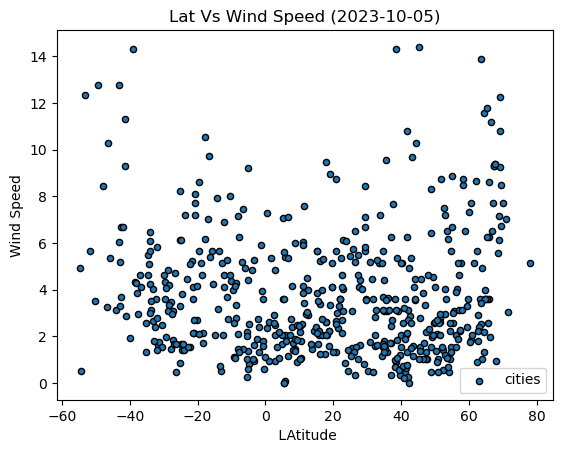

In [17]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", y = "Wind Speed",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="cities"  
                         )

# Incorporate the other graph properties
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Wind Speed ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
      
    (slope, intercept, rvalue, value, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x = {round(intercept,2)} "
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f" The r-value is {rvalue ** 2}")
    plt.show()
    

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brisas de zicatela,15.8369,-97.0419,29.29,58,75,2.06,MX,1696549400
3,iqaluit,63.7506,-68.5145,2.85,100,100,13.89,CA,1696549402
5,tura,25.5198,90.2201,22.17,99,100,1.50,IN,1696549403
6,fenyi,27.8112,114.6681,19.92,78,91,1.63,CN,1696549403
7,san nicolas,18.1725,120.5953,24.95,94,75,2.06,PH,1696549404


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,oriximina,-1.7656,-55.8661,31.62,45,94,1.33,BR,1696549400
2,waitangi,-43.9535,-176.5597,13.79,82,93,3.13,NZ,1696549401
4,arraial do cabo,-22.9661,-42.0278,22.47,95,90,4.47,BR,1696549303
12,mount gambier,-37.8333,140.7667,12.50,49,60,3.86,AU,1696549406
13,avarua,-21.2078,-159.7750,23.03,94,100,4.12,CK,1696549407


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is 0.7152514668697006


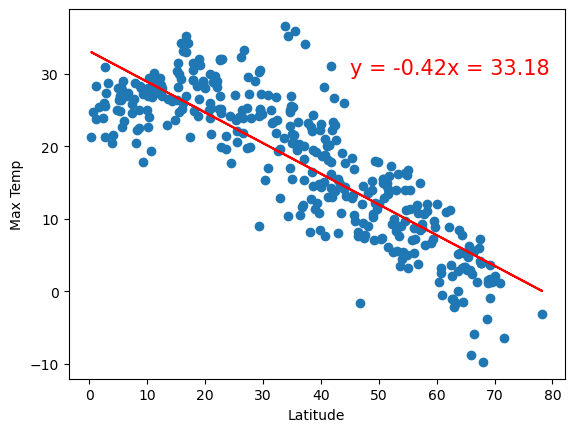

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (45, 30))

 The r-value is 0.6889999212392899


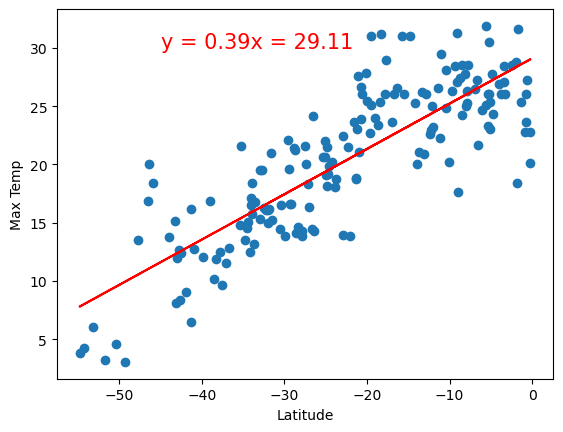

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-45, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 The r-value is 0.004077548718058474


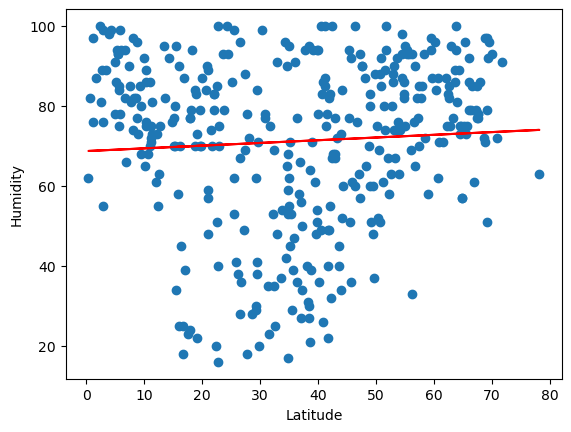

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45, 10))

 The r-value is 0.0027933359500653615


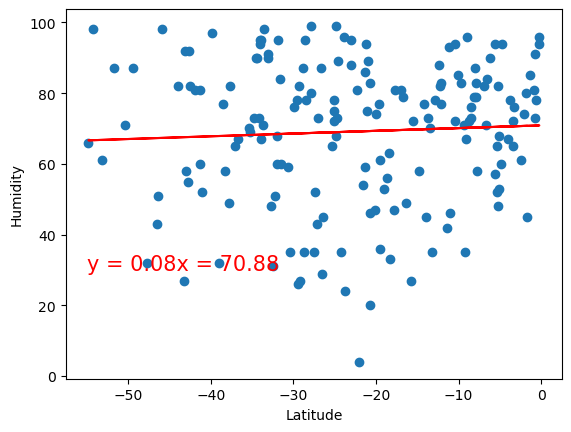

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 The r-value is 0.01389817557079897


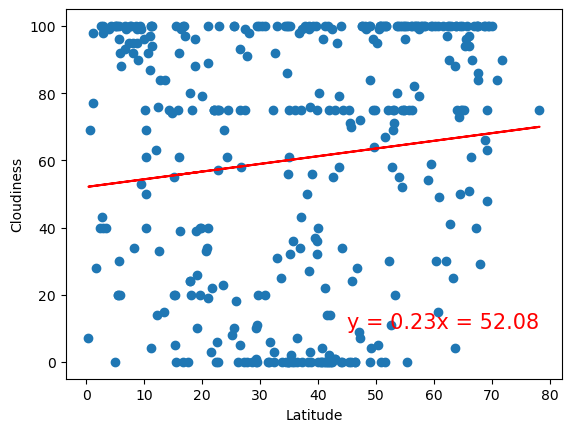

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (45, 10))

 The r-value is 0.0042001811772224805


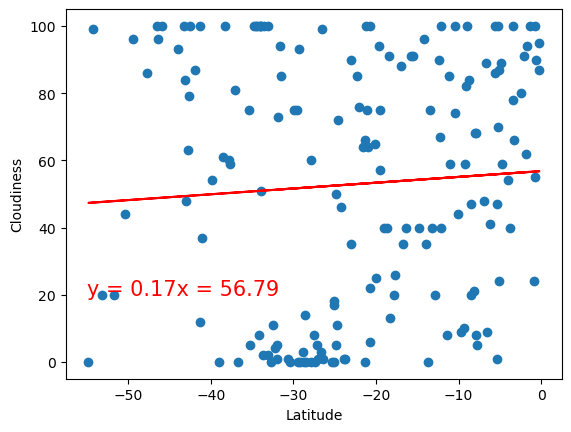

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 The r-value is 0.06097834603465456


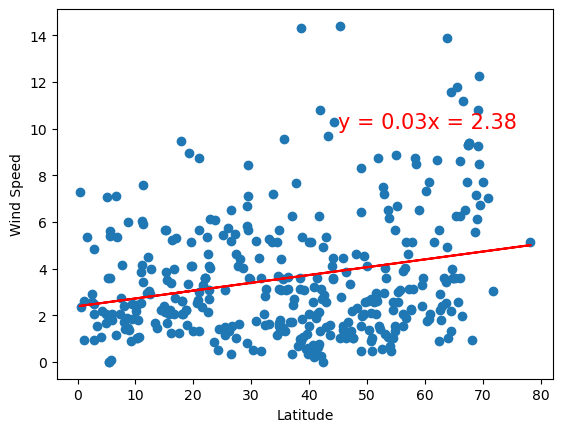

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (45, 10))

 The r-value is 0.0873007030187603


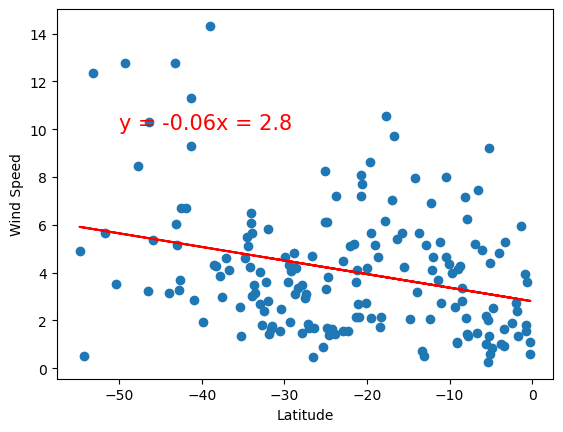

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE